In [2]:
# Import libraries

import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import altair as alt
alt.renderers.enable('notebook')

RendererRegistry.enable('notebook')

In [5]:
# The warnings can fuck right off
import warnings
warnings.filterwarnings('ignore')

desc = pd.read_csv(
    "european-social-survey-ess-8-ed21-201617/variables.csv"
)

data = pd.read_csv(
    "european-social-survey-ess-8-ed21-201617/ESS8e02.1_F1.csv"
)

In [6]:
# Dictionairy of column max,mins
column_dict = {
    "netusoft":(1,5),"ppltrst":(0,10),"pplfair":(0,10),"pplhlp":(0,10),
    "polintr":(1,4),"psppsgva":(1,7),"actrolga":(1,5),"psppipla":(1,7),
    "cptppola":(1,5),"trstprl":(0,10),"trstprl":(0,10),"trstlgl":(0,10),
    "trstplc":(0,10),"trstplt":(0,10),"trstprt":(0,10),"trstep":(0,10),
    "trstun":(0,10),"contplt":(1,2),"wrkprty":(1,2),"wrkorg":(1,2),
    "badge":(1,2),"sgnptit":(1,2),"pbldmn":(1,2),"bctprd":(1,2),
    "pstplonl":(1,2),"clsprty":(1,2),"prtdgcl":(1,4),"lrscale":(0,10),
    "stflife":(0,10),"stfeco":(0,10),"stfgov":(0,10),"stfdem":(0,10),
    "stfedu":(0,10),"stfhlth":(0,10),"gincdif":(1,5), "mnrgtjb":(1,5),
    "freehms":(1,5), "hmsfmlsh":(1,5), "hmsacld":(1,5), "euftf":(0,10),
    "imsmetn":(1,4), "imdfetn":(1,4), "impcntr":(1,4), "imbgeco":(0,10),
    "imueclt":(0,10), "imwbcnt":(0,10), "happy":(0,10), "sclmeet":(1,7),
    "inprdsc":(0,6), "sclact":(1,5), "crmvct":(1,2), "aesfdrk":(1,4),
    "health":(1,5), "hlthhmp":(1,3), "atchctr":(0,10), "atcherp":(0,10),
    "rlgblg":(1,2), "rlgblge":(1,2), "rlgdgr":(0,10), "rlgatnd":(0,7),
    "pray":(1,7), "dscrgrp":(1,2), "dscrrce":(0,1), "dscrntn":(0,1),
    "dscrrlg":(0,1), "dscrlng":(0,1), "dscretn":(0,1), "dscrage":(0,1),
    "dscrgnd":(0,1), "dscrsex":(0,1), "dscrdsb":(0,1), "dscroth":(0,1),
    "dscrdk":(0,1), "dscrref":(0,1), "dscrnap":(0,1),"dscrna":(0,1),
    "ctzcntr":(1,2), "brncntr":(1,2), "blgetmg":(1,2), "facntr":(1,2),
    "mocntr":(1,2), "gvrfgap":(1,5), "rfgfrpc":(1,5), "rfgbfml":(1,7),
    "eneffap":(0,10), "rdcenr":(1,6), "cflsenr":(0,10),"elgcoal":(1,5),
    "elgngas":(1,5),"elgngas":(1,5),"elghydr":(1,5),"elgnuc":(1,5),
    "elgsun":(1,5),"elgwind":(1,5),"elgbio":(1,5),"wrpwrct":(1,5),
    "wrenexp":(1,5),"wrdpimp":(1,5),"wrdpfos":(1,5),"wrntdis":(1,5),
    "wrinspw":(1,5),"wrtcfl":(1,5),"wrtratc":(1,5),"clmchng":(1,4),
    "clmthgt1":(1,5),"clmthgt2":(1,5),"ccnthum":(1,5),"ccrdprs":(0,10),
    "wrclmch":(1,5),"ccgdbd":(0,10),"lkredcc":(0,10),"lklmten":(0,10),
    "gvsrdcc":(0,10),"ownrdcc":(0,10),"inctxff":(1,5),"sbsrnen":(1,5),
    "banhhap":(1,5),"dfincac":(1,5),"smdfslv":(1,5),"uemplwk":(1,11),
    "slvpens":(0,10),"slvuemp":(0,10),"gvslvol":(0,10),"gvslvue":(0,10),
    "gvcldcr":(0,10),"sbstrec":(1,5),"sbprvpv":(1,5),"sbeqsoc":(1,5),
    "sbbsntx":(1,5),"sblazy":(1,5),"sblwcoa":(1,5),"imsclbn":(1,5),
    "uentrjb":(1,5),"lbenent":(1,5),"bennent":(1,5),"admub":(1,4),
    "ubpay":(1,4),"ubedu":(1,4),"ubunp":(1,4),"ub50pay":(1,4),
    "ub50edu":(1,4),"ub50unp":(1,4),"ub20pay":(1,4),"ub20edu":(1,4),
    "ub20unp":(1,4),"ubsppay":(1,4),"ubspedu":(1,4),"ubspunp":(1,4),
    "bnlwinc":(1,4),"eduunmp":(1,4),"wrkprbf":(1,4),"basinc":(1,4),
    "eusclbf":(1,4),"eudcnbf":(1,5),"lkuemp":(1,4),"lknemny":(1,4),
    "vteurmmb":(1,2),"vteumbgb":(1,2),"vteubcmb":(1,2),"lvgptnea":(1,2),
    "dvrcdeva":(1,2),"iccohbt":(1,2),"chldhm":(1,2),"chldhhe":(1,2),
    "domicil":(1,5),"pdwrk":(0,1),"edctn":(0,1),"uempla":(0,1),
    "uempli":(0,1),"dsbld":(0,1),"rtrd":(0,1),"cmsrv":(0,1),
    "hswrk":(0,1),"dngoth":(0,1),"dngref":(0,1),"dngdk":(0,1),
    "dngna":(0,1),"icomdng":(1,2),"icpdwrk":(1,2),"crpdwk":(1,2),
    "pdjobev":(1,2),"estsz":(1,5),"jbspv":(1,2),"wkdcorga":(0,10),
    "iorgact":(0,10),"icwhct":(1,2),"wrkac6m":(1,2),"uemp3m":(1,2),
    "uemp12m":(1,2),"uemp5yr":(1,2),"hinctnta":(1,10),"hincfel":(1,4),
    "icpart3":(1,2),"pdwrkp":(0,1),"edctnp":(0,1),"uemplap":(0,1),
    "uemplip":(0,1),"dsbldp":(0,1),"rtrdp":(0,1),"cmsrvp":(0,1),
    "hswrkp":(0,1),"dngothp":(0,1),"dngdkp":(0,1),"dngnapp":(0,1),
    "dngrefp":(0,1),"dngnap":(0,1),"icppdwk":(1,2),"crpdwkp":(1,2),
    "atncrse":(1,2),"ipcrtiv":(1,6),"imprich":(1,6),"ipeqopt":(1,6),
    "ipshabt":(1,6),"impsafe":(1,6),"impdiff":(1,6),"ipfrule":(1,6),
    "ipudrst":(1,6),"ipmodst":(1,6),"ipgdtim":(1,6),"impfree":(1,6),
    "iphlppl":(1,6),"ipsuces":(1,6),"ipstrgv":(1,6),"ipadvnt":(1,6),
    "ipbhprp":(1,6),"iprspot":(1,6),"iplylfr":(1,6),"impenv":(1,6),
    "imptrad":(1,6),"impfun":(1,5)
    
}
print(column_dict["netusoft"])
print(column_dict["netusoft"][0])
print(column_dict["netusoft"][1])

(1, 5)
1
5


In [65]:
# ------------------------------------------------------
# --------------Filter to useful questions--------------
# ------------------------------------------------------
def drop_unusable_data(df):
    # Select non-country-specific questions
    # Drop all continuous data
    # Drops all nominal data
    df = df[df.Country_specific == "no"]
    df = df[df.Type != "continuous"]
    df = df[df.Scale_type != "nominal"]
    return df
#This lists groups in dictionairy after
#print("len(data.columns):",data.shape)
#print("len(desc.rows):",desc.shape)
groups = [e for e in desc.Group.unique()]
interested_desc = desc[(desc.Group != "Group Country")]
interested_desc = interested_desc[(desc.Group != "Group Weights")]
interested_desc = interested_desc[(desc.Group != "Group Administrative variables")]
dropped = drop_unusable_data(interested_desc)
# Filter with `data` to select questions in group by name
useful_questions = data.filter(dropped.Name)

#print("useful_questions:",useful_questions)
print("useful_questions.shape:",useful_questions.shape)
#print(useful_questions["netusoft"])


useful_questions.shape: (44387, 228)


In [66]:
# ------------------------------------------------------
# ---------------Filter to useful answers---------------
# ------------------------------------------------------

# Takes around 14 minutes to run

print(useful_questions["netusoft"])

def adjust_and_drop_to_range(df):
    for col in df.columns:
        df[col] = df[col].astype(float)
        #print("df[col]:",df[col])
        col_range = column_dict[col][1] - column_dict[col][0]
        for i in range(0,len(df[col])):
#             print("df[",col,"][",i,"]:",df[col][i])
#             print("column_dict[",col,"][",0,"]",column_dict[col][0])
#             print("column_dict[",col,"][",1,"]",column_dict[col][1])
            if df[col][i] < column_dict[col][0] or df[col][i] > column_dict[col][1]:
                #print("Out range")
                df[col][i] = float("NaN") # Sets it to be ignored in calculations
            else:
                #print("In range")
                df[col][i] = (df[col][i] - column_dict[col][0]) / col_range
        #break
    return df

grouped_answers = adjust_and_drop_to_range(useful_questions)
print("grouped_answers.shape:",grouped_answers.shape)
print("len(useful_questions['netusoft']):",len(useful_questions["netusoft"]))
print("useful_questions['netusoft']:",useful_questions["netusoft"])
print("useful_questions.head():",useful_questions.head())

0        4
1        5
2        2
3        5
4        5
        ..
44382    2
44383    5
44384    5
44385    5
44386    5
Name: netusoft, Length: 44387, dtype: int64
grouped_answers.shape: (44387, 228)
len(useful_questions['netusoft']): 44387
useful_questions['netusoft']: 0        0.75
1        1.00
2        0.25
3        1.00
4        1.00
         ... 
44382    0.25
44383    1.00
44384    1.00
44385    1.00
44386    1.00
Name: netusoft, Length: 44387, dtype: float64
useful_questions.head():    netusoft  ppltrst  pplfair  pplhlp   polintr  psppsgva  actrolga  psppipla  \
0      0.75      0.8      0.8     0.3  0.000000  0.166667      0.25  0.166667   
1      1.00      0.6      0.6     0.5  0.000000  0.000000      0.50  0.166667   
2      0.25      0.5      0.6     0.4  0.666667  0.166667      0.25  0.166667   
3      1.00      0.6      0.5     0.6  0.333333  0.333333      0.25  0.333333   
4      1.00      0.5      0.5     0.7  0.666667  0.333333      0.50  0.500000   

   cptppola  trs

Dropdown(description='Interest:', options=('Media and social trust', 'Politics', 'Subjective well-being, socia…

filtered_to_group.shape: (44387, 41)
group_means.shape: (41, 2)


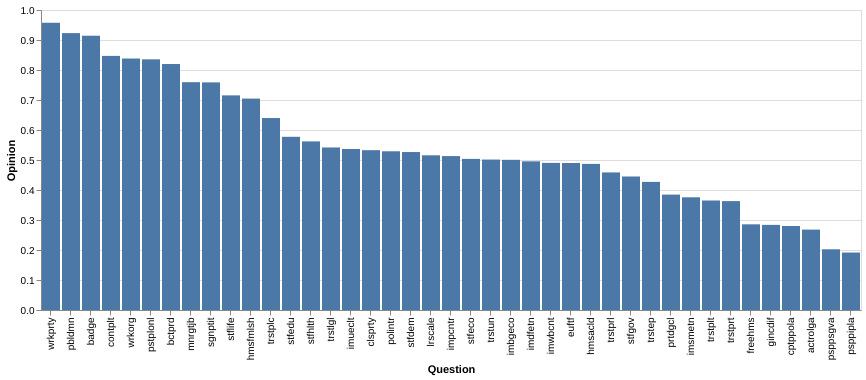

In [74]:
# A simple beginning for starting to learn how to incorporate interaction

import ipywidgets as widgets
from IPython.display import display
#print(desc.Group.unique())

interestGroup = widgets.Dropdown(
    # `e[6:]` remove "Group" substring from before each option
    # `desc.Group.unique()` gets all unique values in the `Group` column
    # `[2:]` removes first 2 options of `Country` and `Weights`
    options=[e[6:] for e in desc.Group.unique()[2:]],
    description='Interest:',
)
display(interestGroup)  


# # Drops all columns it cannot caste to float
# def drop_uncastable(dataframe):
#     for col in dataframe.columns:
#         try:
#             dataframe[col] = dataframe[col].astype(float)
#         except:
#             dataframe = dataframe.drop(columns=[col],axis=1)
            
#     return dataframe
    
def on_change(change):
    if change['type'] == 'change' and change['name'] == 'value':
        # Select questions group
        interested_desc = desc[(desc.Group == "Group " + interestGroup.value)]
        # Filter with `data` to select questions in group by name
        filtered_to_group = grouped_answers.filter(interested_desc.Name)
        print("filtered_to_group.shape:",filtered_to_group.shape)
        group_means = filtered_to_group.mean().reset_index()
        group_means.columns = ["Question","Opinion"]
        print("group_means.shape:",group_means.shape)
        test = alt.Chart(group_means).mark_bar().encode(
            x=alt.X("Question:O",sort=alt.EncodingSortField(field="Opinion",order="descending")),
            y=alt.Y("Opinion:Q",)
        )
        display(test)
        

interestGroup.observe(on_change)
